#### 평가 (Evaluation)
---
+ 머신러닝은 주로 아래와 같은 프로세스를 거친다
    - 데이터 가공/변환
    - 모델 학습/예측
    - 평가(Evaluation)

+ 머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가한다. 성능 평가 지표(Evaluation Metric)의 경우 모델이 분류나, 회귀냐에 따라 여러 종류로 나뉜다
    - 회귀의 경우 대부분 실제 값과 예측 값의 오차 평균값에 기반
        - 오차에 절댓값을 씌운 뒤 평균 오차를 구하거나 그 값을 정규화시켜 사용
    - 분류의 성능 평가 지표는 아래와 같은 것들이 있다
        - 정확도 (Accuracy)
        - 오차 행렬 (Confusion Matrix)
        - 정밀도 (Precision)
        - 재현율 (Recall)
        - F1 스코어
        - ROC AUC
    - 분류는 결정 클래스의 값 종류 유형에 따라 긍정/부정과 같은 2가지의 값만을 갖는 이진 분류와, 여러 개의 결정 클래스 값을 가지는 멀티 분류로 나뉜다
    - 위의 분류 성능 평가 지표들은 두 가지 유형에 모두 적용되지만, 특히 이진 분류에서 중요하다

##### 정확도 (Accuracy)
---
+ 정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
    - 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
    - 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있다
        - 왜곡의 예: 이전에 진행하였던 타이타닉 수행 결과의 경우 예측 정확도가 보통 80%였다. 탑승객이 여자인 경우 생존 확률이 높았기 때문에 별다른 알고리즘 적용 없이 무조건 성별이 여자이면 생존, 남자이면 사망으로 예측 결과를 예측해도 비슷한 수치가 나온다!
        - 이를 실제 코드로 구현하여 확인해보자

In [19]:
from sklearn import preprocessing
from sklearn.base import BaseEstimator
import numpy as np
class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None): # fit 메소드는 아무 것도 학습하지 않음
        pass
    def predict(self, X): # Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if(X['Sex'].iloc[i] == 1):
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


+ 위와 같이 단순한 알고리즘으로 예측을 해도 데이터 구성에 따라 정확도 결과가 높게 나올 수 있다.
+ 정확도는 불균형한 (imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우 적합하지 않다
    - 예를 들어 100개의 데이터가 있고 이 중에 90개의 데이터 레이블이 0, 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측해도 90%의 정확도가 나옴
+ MNIST 데이터 세트를 변환해 불균형하게 만든 뒤 정확도 지표를 적용해보자
    - MNIST 데이터 세트는 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며, 이를 기반으로 숫자 Digit을 예측하는데 사용된다.
    - 사이킷런은 load_digits() API를 통해 이 데이터 세트를 제공한다.
    - 원래는 0~9까지의 레이블 값을 가진 멀티 분류 문제이지만, 레이블 값이 7인 것을 True, 그렇지 않은 것을 False로 하여 이진 분류 문제로 변경해보자

In [29]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X): # 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환 (모두 0값으로 예측)
        return np.zeros((len(X), 1), dtype=bool)

digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [23]:
print('레이블 테스트 세트 크기: ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기:  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [25]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

모든 예측을 0으로 하여도 정확도는: 0.900


+ 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용되어서는 안된다
+ 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용되어야 한다
    - 먼저 True/False, Positive/Negative의 4분면으로 구성되는 오차 행렬(Confusion Matrix)을 살펴보자.

##### 오차행렬
---
|실제값\예측값|Negative(0)|Positive(1)|
|:---:|:--:|:--:|
|Negative(0)|TN|FP|
|Positive(1)|FN|TP|

+ TN(True Negative): 예측을 Negative(0)값으로 하고, 실제 값 역시 Negative(0)
+ FP(False Positive): 예측을 Positive(1)값으로 했으나, 실제 값은 Negative(0)
+ FN(False Negative): 예측을 Negative(0)값으로 했으나, 실제 값은 Positive(1)
+ TP(True Positive): 예측을 Positive(1)값으로 하고, 실제 값 역시 Positive(1)

+ 사이킷런은 오차행렬을 구하기 위해 confusion_matrix() API를 제공한다. 정확도 예제에서의 MyFakeClassifier()의 예측 성능 지표를 표현해보자

In [28]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, fakepred)
print('TN: {0}'.format(c_matrix[0][0]))
print('FP: {0}'.format(c_matrix[0][1]))
print('FN: {0}'.format(c_matrix[1][0]))
print('TP: {0}'.format(c_matrix[1][1]))

TN: 405
FP: 0
FN: 45
TP: 0


+ 정확도는 오차 행렬 상에서 다음과 같이 정의된다
    - 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN+TP)/(TN+FP+FN+TP)
  
+ 일반적으로 이렇게 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 적은 수의 결과 값에 Positive(1)를 부여하는 경우가 많다. 이렇게 Positive 데이터 건수가 매우 작기 때문에 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생한다
    - 이말은 TN은 매우 커지고 TP는 매우 작아진다는 뜻
    + 또한 Negative로 예측할 때 정확도가 높기 때문에 FP 또한 매우 작아진다
    - Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나오는 수치적인 판단 오류를 범하게 된다

+ 불균형한 데이터 세트에서는 정확도보다 정밀도와 재현율이 더 선호되는 평가지표이다

##### 정밀도 (Precision)와 재현율 (Recall)
---
+ 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다. 앞서 만든 MyFakeClassifier는 Positive로 예측한 TP값이 하나도 없기 때문에 정밀도와 재현율 값이 모두 0이다
    + 정밀도: TP / (FP + TP)
    + 재현율: TP / (FN + TP)
    - 정밀도는 예측을 Positive로 한 대상 중에 실제 값이 Positive로 일치한 데이터의 비율. 양성 예측도라고도 불린다
    - 재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율. 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불린다
    
- 둘 중 이진 분류 모델의 업무 특성에 따라 특정 지표가 더 중요하게 간주될 수 있다
    - 재현율이 중요한 경우: 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향을 발생하는 경우
        - 예1) 암 판단 모델: 실제 암 환자를 Negative 음성으로 잘못 판단하는 경우 오류의 대가가 크기 때문. 실제 Negative인 건강한 환자를 Positive로 예측한 경우면 다시 한번 재 검사를 하는 수준의 대가
        - 예2) 보험 사기 적발 모델: 실제 금융 거래 사기를 그렇지 않게 예측하면 회사에 미치는 손해가 크기 때문. 정상 거래를 금융 사기로 판단하더라도 다시 한번 재확인해주면 됨
    - 정밀도가 중요한 경우: 실제 Negative 음성 데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향을 발생하는 경우
        - 예1) 스팸메일 여부를 판단하는 모델: 실제 스팸 메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, 실제 Negative한 일반 메일을 Positive로 분류할 경우에는 중요한 메일을 받지 못하게 되어 업무에 큰 차질이 생김

+ 재현율과 정밀도 모두 TP를 높이는 데에 동일하게 초점을 맞추지만, 재현율은 FN을 낮추는데에, 정밀도는 FP를 낮추는데에 초점을 둔다
    - 서로 보완적인 지표로 분류의 성능을 평가하는데 적용된다


+ 타이타닉 예제에서 오차행렬 / 정밀도 / 재현율을 모두 구해서 예측 성능을 평가해보자. 사이킷런은 정밀도를 위해 precision_score(), 재현율을 위해 recall_score()를 API로 제공한다.

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},'.format(accuracy, precision, recall))

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=15)
lr_clf = LogisticRegression(max_iter=1000)

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[86 17]
 [21 55]]
정확도: 0.7877, 정밀도: 0.7639, 재현율: 0.7237,


+ 정밀도에 비해 재현율이 낮게 나왔다. 둘 다 높일 수 있는 방법은 무엇일까?

##### 정밀도/재현율 트레이드오프
---
+ 분류하려는 업무의 특성 상 정밀도 또는 재현율이 특별히 강조되어야 할 경우 분류의 결정 임곗값(Threadhold)를 조정해 정밀도 또는 재현율의 수치를 높일 수 있다. 하지만 어느 한쪽을 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 트레이드오프라고 부른다

+ 사이킷런의 분류 알고리즘은 개별 레이블 별로 결정 확률을 구한다. 예측 확률이 큰 레이블 값으로 예측하게 되는 것..
    - 예를 들어 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%라면 최종 예측은 더 큰 확률을 가진 90%의 1로 판단.. 
    - 일반적으로 이진 분류에서는 이 임곗값을 0.5, 즉 50%로 정하고 이 값을 기준으로 하여 Positive/Negative 여부를 결정한다

+ 사이킷런은 개별 데이터 별로 예측 확률을 반환하는 메소드인 predict_proba()를 제공한다. 이는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며, 테스트 피처 데이터 세트를 파라미터로 입력해주어 각 레코드의 개별 클래스 예측 확률을 반환한다

In [39]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n:', pred_proba[:3])

# 예측확률 array와 예측 결괏값 array를 병합해 한 눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('2개의 클래스 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
: [[0.03631343 0.96368657]
 [0.22987737 0.77012263]
 [0.25953917 0.74046083]]
2개의 클래스 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.03631343 0.96368657 1.        ]
 [0.22987737 0.77012263 1.        ]
 [0.25953917 0.74046083 1.        ]]


+ 사실 predict() 메소드는 predict_proba() 메소드에 기반해 생성된 API
+ 임곗값을 조정해 정밀도와 재현율의 성능 수치를 조정할 수 있다
+ 사이킷런의 predict()의 임곗값을 0.5로 가진다. 이러한 로직 구현을 위해 사이킷런의 Binarizer 클래스를 이용
    + 아래 예제에서는 thresdhold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성한다
    + 생성된 객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 임곗값을 기준으로 0/1로 변환해서 반환한다

In [40]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


+ 이를 이용해 predict()의 의사 코드를 만들어보자

In [41]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1) # 두번째 칼럼, 즉 Positive 클래스 컬럼 하나만 추출해 적용
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[86 17]
 [21 55]]
정확도: 0.7877, 정밀도: 0.7639, 재현율: 0.7237,


+ 앞서 살펴본 결과와 완전히 동일하다. 임곗값을 낮추면?

In [42]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1) # 두번째 칼럼, 즉 Positive 클래스 컬럼 하나만 추출해 적용
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[85 18]
 [17 59]]
정확도: 0.8045, 정밀도: 0.7662, 재현율: 0.7763,


+ 정밀도는 큰 변화가 없지만 재현율은 올라간다
    - 기본적으로는 정밀도는 내려가는 것이 이론적으로 맞다
    - 왜?
        - 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 된다. 확률이 0.4부터 Positive로 예측을 너그럽게 하게되므로, True로 판단하는 값이 많아질 것
        - 따라서 재현율 값이 높아진다 (양성 예측을 많이하므로 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문에)
        - TP와 FP는 증가하고, TN와 FN은 감소한다

+ 임곗값을 점차적으로 증가시키며 평가지표를 살펴보자

In [43]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.60]
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.4
오차 행렬
[[85 18]
 [17 59]]
정확도: 0.8045, 정밀도: 0.7662, 재현율: 0.7763,
임곗값:  0.45
오차 행렬
[[85 18]
 [19 57]]
정확도: 0.7933, 정밀도: 0.7600, 재현율: 0.7500,
임곗값:  0.5
오차 행렬
[[86 17]
 [21 55]]
정확도: 0.7877, 정밀도: 0.7639, 재현율: 0.7237,
임곗값:  0.55
오차 행렬
[[90 13]
 [23 53]]
정확도: 0.7989, 정밀도: 0.8030, 재현율: 0.6974,
임곗값:  0.6
오차 행렬
[[94  9]
 [25 51]]
정확도: 0.8101, 정밀도: 0.8500, 재현율: 0.6711,


+ 임곗값이 증가할수록 정밀도는 증가하고 재현율은 감소한다
+ 사이킷런은 이와 유사하게 precision_recall_curve() API를 제공한다
    - 입력 파라미터
        - y_true: 실제 클래스 값 배열
        - probas_pred = Positive 컬럼의 예측 확률 배열
    - 반환 값
        - 정밀도: 임곗값 별 정밀도 값을 배열로 반환
        - 재현율: 임곗값 별 재현율 값을 배열로 반환
        
+ 해당 API는 일반적으로 임곗값 배열을 0.11~0.95정도의 값을 담은 배열로 사용한다. 너무 많이 구성되어있으므로 샘플을 10개만, 임곗값을 15단계로 추출해 평가 지표를 확인해보자

In [46]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값의 배열 Shape: ', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임곗값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값의 배열 Shape:  (165,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값 [0.06 0.09 0.12 0.15 0.16 0.26 0.42 0.59 0.71 0.81 0.9 ]
샘플 임곗값별 정밀도:  [0.442 0.471 0.518 0.569 0.648 0.717 0.766 0.836 0.911 0.933 0.933]
샘플 임곗값별 재현율:  [1.    0.974 0.947 0.921 0.921 0.868 0.776 0.671 0.539 0.368 0.184]


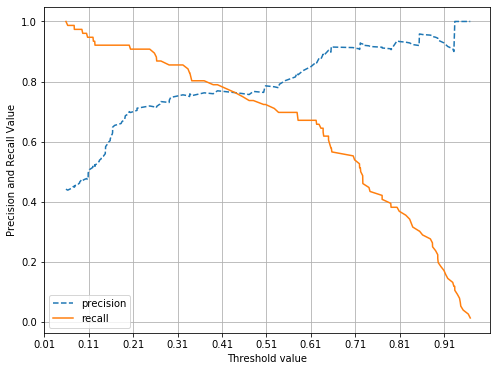

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    # X축은 임곗값, Y축은 정밀도, 재현율 값으로 각각 Plotting, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 레이블과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

##### 정밀도와 재현율의 맹졈
---
+ 임곗값은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용되어야 한다
+ 아래는 극단적인 케이스를 나열한 것으로, 단순히 숫자 놀음이다
    - 정밀도가 100%가 되는 방법: 확실한 기준이 되는 경우만 양성으로 예측하고 나머지는 모두 음성으로 예측한다. 예를 들어 환자가 80세 이상이고 비만이며 이전에 암 진단을 받았고 암세포의 크기가 상위 0.1% 이상이면 무조건 양성, 나머지는 음성
        - 전체 환자 1000명 중 확실한 양성 징후만 가진 환자는 1명이라고 하면 이 한명만 양성으로 예측하고 나머지는 음성으로 예측해도 FP=0, TP=1이므로 1/(1+0) = 100%가 된다
    - 재현율이 100%가 되는 방법: 모든 환자를 양성으로 예측한다. 재현율 = TP / (TP + FN) 이므로 전체 환자를 다 양성으로 예측하면 실제 양성이 30명정도라도 TN이 수치에 포함되지 않고 FN은 0이므로 30/(30+0)으로 100%가 된다
    
+ 따라서, 정밀도와 재현율의 수치가 적절하게 조합돼 종합적인 성능 평가에 사용될 수 있는 지표가 필요하다
    - F1 Score

##### F1 스코어
---
+ F1 스코어는 정밀도와 재현율을 결합한 지표이다. 이 지표는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다
    - F1 Score = 2 / ((1/Recall) + (1/Precision)) = 2 * ((precision*recall)/(precision+recall))
+ 사이킷런은 F1 스코어를 구하기 위해 f1_score() API를 제공한다

In [51]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7432


In [53]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # f1 score 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds= [0.4, 0.45, 0.5, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.4
오차 행렬
[[85 18]
 [17 59]]
정확도: 0.8045, 정밀도: 0.7662, 재현율: 0.7763, F1:0.7712
임곗값:  0.45
오차 행렬
[[85 18]
 [19 57]]
정확도: 0.7933, 정밀도: 0.7600, 재현율: 0.7500, F1:0.7550
임곗값:  0.5
오차 행렬
[[86 17]
 [21 55]]
정확도: 0.7877, 정밀도: 0.7639, 재현율: 0.7237, F1:0.7432
임곗값:  0.55
오차 행렬
[[90 13]
 [23 53]]
정확도: 0.7989, 정밀도: 0.8030, 재현율: 0.6974, F1:0.7465
임곗값:  0.6
오차 행렬
[[94  9]
 [25 51]]
정확도: 0.8101, 정밀도: 0.8500, 재현율: 0.6711, F1:0.7500


##### ROC 곡선과  AUC
---
+ ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다.
+ ROC 곡선 (Receiver Operation Characteristic Curve): 수신자 판단 곡선
    - FPR(False Positive Rate)이 변할 때, TPR(True Positive Rate)이 어떻게 변하는 지를 나타낸 곡선
    - FPR을 X축, TPR을 Y축으로 잡으면 곡선 형태로 나타난다
    - TPR은 재현율을 나타내며, 민감도라고도 불린다고 이미 언급했다. 이에 대응하는 지표로 TNR(True Negative Rate)은 특이성이라고 불린다
        - 민감도(TPR)은 실제 값 양성이 정확히 예측되어야 하는 수준을 나타낸다 (양성은 양성으로)
        - 특이성(NPR)은 실제 값 음성이 정확히 예측되어야 하는 수준을 나타낸다 (음성은 음성으로)
        - 특이성은 다음과 같이 구한다
            - TNR = TN / (FP + TN)
            - 수식을 잘 보면 ROC 곡선의 X축인 FPR은 FP / (FP + TN) 이므로 1 - TNR (1 - 특이성)으로 표현된다.
            
+ ROC 곡선의 예를 살펴보면, 가운데 직선에 가까울 수록 성능이 떨어지는 것이며 멀어질 수록 성능이 뛰어난 것이다.
    - ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구한다. 그럼 어떻게 FPR을 변경할 수 있을까? -> 임계값을 이용한다
    - FPR을 0으로 만들기 위해서는?
        - FPR = FP / (FP + TN)이므로 FP을 0으로 만들어준다
        - 임곗값을 1로 지정해주면 양성의 예측 기준이 매우 높아져서 아예 P 예측 값이 0이 된다
    - FPR을 1로 만들기 위해서는 임곗값을 0으로 지정하면 된다
        - FPR = FP / (FP + TN)이므로 TN을 0으로 만들어준다
        - 임곗값을 0으로 지정해주면 모두 양성으로 예측하므로 자연스럽게 TN은 0이 된다

+ 사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공한다. 사용법은 precision_recall_curve() API와 유사하며, 단지 반환값이 FPR, TPR, 임곗값으로 
    - 입력 파라미터
        - y_true: 실제 클래스 값
        - y_score: predict_proba()의 반환 값에서 Positive 칼럼의 예측확률을 주로 사용
    - 반환값
        - fpr: fpr값을 배열로 반환
        - tpr: tpr값을 배열로 반환
        - threshold: 임곗값을 배열로 반환
        
+ 타이타닉 생존자 예측 모델의 해당 값들을 구해보자

In [54]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51 56]
샘플용 10개의 임곗값:  [0.97 0.8  0.65 0.63 0.58 0.47 0.34 0.26 0.15 0.12 0.11 0.06]
샘플 임곗값별 FPR:  [0.    0.019 0.049 0.068 0.107 0.175 0.194 0.252 0.534 0.65  0.777 0.932]
샘플 임곗값별 TPR:  [0.013 0.382 0.579 0.645 0.697 0.737 0.829 0.868 0.921 0.947 0.961 0.987]


+ 해당 값들을 살펴보면 임곗값이 1에서 가까운 점에서 점점 작아지면서 FPR은 커진다. 그리고 FPR이 조금씩 커질때 TPR은 가파르게 커진다
+ 시각화해보자.

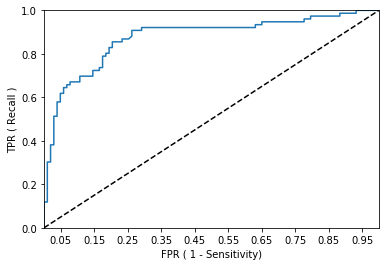

In [55]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR ( 1 - Sensitivity)')
    plt.ylabel('TPR ( Recall )')
    plt.legend
    
roc_curve_plot(y_test, pred_proba[:, 1])

+ 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화값을 보는데 이용하여 분류의 성능지표로 사용되는 것은 곡선 면적에 기반한 AUC 값으로 결정한다
+ AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한것으로 일반적으로 1에 가까울 수록 좋은 수치이다
+ 해당 수치가 커지려면, FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
+ 가운데 직선의 경우 랜덤 수준의 이진 분류 AUC 값으로 0.5의 값을 가진다

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print('정확도:', np.round(accuracy_score(y_target, preds), 4))
print('정밀도:', np.round(precision_score(y_target, preds), 4))
print('재현율:', np.round(recall_score(y_target, preds), 4))

NameError: name 'y_target' is not defined

In [61]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # f1 score 추가
    f1 = f1_score(y_test, pred)
    # roc-auc 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, pred, pred_proba_class1)

오차 행렬
[[86 17]
 [21 55]]
정확도: 0.7877, 정밀도: 0.7639, 재현율: 0.7237, F1:0.7432, AUC:0.8754
